# Sellers by category
Notebook to start some comparisons among similar sellers.

## Imports & styling

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import requests
from IPython.core.display import Image, display

# Own API handler and tools
import mercadolibre as ml

# Charts styling
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # increases figure size
matplotlib.rcParams.update({'font.size': 14}) # increases chart font size
rcParams['font.family'] = 'Arial Narrow'

# Style to enhance df viz, from https://github.com/brandon-rhodes/pycon-pandas-tutorial
from IPython.core.display import HTML
css = open('style/style-table.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Query

In [2]:
_category = 'MLB180269'

In [3]:
m, category_name = ml.get_sellers_by_category(_category)#, total_results_limit=1000)

Searching for "N/A" in Bicicletas sold by N/A...


100%|██████████| 28072/28072 [03:12<00:00, 126.22it/s]


Initial request sent to API: https://api.mercadolibre.com/sites/MLB/search?q=&category=MLB180269&limit=1&offset=0
28072 results found.


In [4]:
m.head()

,average_price,sold_quantity,available_quantity,revenue,days_ago,listings,market_share
seller_id,,,,,,,
165332412,1054.204848,7742,1295026,6908794.00,56895,165,0.163880
93291664,1207.598204,5092,90422,4110638.50,35097,167,0.097506
113214310,1881.503065,1524,31838,3021862.31,15423,62,0.071680
116318056,1082.666322,3097,187481,2564048.14,22807,87,0.060821
149927170,1619.702222,1804,88634,2434764.00,14038,45,0.057754


## Market share visualization

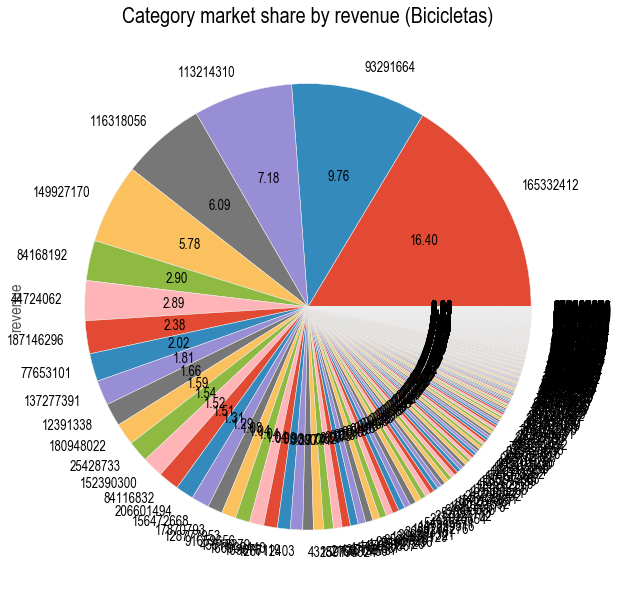

In [10]:
m.revenue[:500].plot.pie(figsize=(10,10), autopct='%.2f')
plt.title('Category market share by revenue (' + category_name + ')', fontsize=22)

## Leader's products

In [6]:
leader = m.sort_values('revenue', ascending=False).index[0]  # Category leader (by revenue)
r = ml.get_df_from_query(seller_id=leader, category=_category)

Searching for "N/A" in Bicicletas sold by 165332412...


100%|██████████| 314/314 [00:03<00:00, 113.46it/s]


Initial request sent to API: https://api.mercadolibre.com/sites/MLB/search?offset=0&q=&category=MLB180269&limit=1&seller_id=165332412
314 results found.


In [7]:
r.head()

,title,price,sold_quantity,available_quantity,permalink,thumbnail,seller_address,seller,stop_time,category_id,revenue,start_time,days_ago,city,state,seller_id
id,,,,,,,,,,,,,,,,
MLB687376917,"Bicicleta Aro 26 Envoy Com Kit Shimano, 21v Di...",1299.0,0,893,http://produto.mercadolivre.com.br/MLB-6873769...,http://mlb-s1-p.mlstatic.com/473621-MLB2080671...,"{'longitude': -46.7535366, 'zip_code': '', 'ci...","{'real_estate_agency': False, 'car_dealer': Fa...",2035-08-01 15:28:49,MLB209854,0.0,2015-08-01 15:28:49,484,São Paulo,São Paulo,165332412
MLB687872619,Bicicleta Aro 26 Alfameq Kit Shimano 21 Veloci...,939.9,3,7527,http://produto.mercadolivre.com.br/MLB-6878726...,http://mlb-s2-p.mlstatic.com/621621-MLB2080534...,"{'longitude': -46.7535366, 'zip_code': '', 'ci...","{'real_estate_agency': False, 'car_dealer': Fa...",2035-08-02 18:24:00,MLB209926,2819.7,2015-08-02 18:24:00,483,São Paulo,São Paulo,165332412
MLB687872715,Mtb Bike Aro 26 Alfameq Kit Shimano 21 Marchas...,939.9,0,7530,http://produto.mercadolivre.com.br/MLB-6878727...,http://mlb-s2-p.mlstatic.com/827521-MLB2080533...,"{'longitude': -46.7535366, 'zip_code': '', 'ci...","{'real_estate_agency': False, 'car_dealer': Fa...",2035-08-02 18:24:50,MLB209926,0.0,2015-08-02 18:24:50,483,São Paulo,São Paulo,165332412
MLB687874868,Bike Aro 29 Quadro Alumínio Alfameq Kit Shiman...,959.0,11,7519,http://produto.mercadolivre.com.br/MLB-6878748...,http://mlb-s1-p.mlstatic.com/249115-MLB2515213...,"{'longitude': -46.7535366, 'zip_code': '', 'ci...","{'real_estate_agency': False, 'car_dealer': Fa...",2035-08-02 18:19:36,MLB209894,10549.0,2015-08-02 18:19:36,483,São Paulo,São Paulo,165332412
MLB687915203,Bike Mtb Quadro 19 Aluminío Aro 26 Viking 21v ...,1149.0,1,8329,http://produto.mercadolivre.com.br/MLB-6879152...,http://mlb-s2-p.mlstatic.com/809521-MLB2080680...,"{'longitude': -46.7535366, 'zip_code': '', 'ci...","{'real_estate_agency': False, 'car_dealer': Fa...",2035-08-02 20:08:49,MLB209710,1149.0,2015-08-02 20:08:49,483,São Paulo,São Paulo,165332412
